# Demagnetizing factors 

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from fatiando import mesher, utils
from fatiando.gravmag import triaxial_ellipsoid, prolate_ellipsoid, oblate_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# Set some plot parameters
from matplotlib import rcParams
rcParams['figure.dpi'] = 300.
rcParams['font.size'] = 6
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.labelsize'] = 'large'
rcParams['legend.fontsize'] = 'medium'
rcParams['savefig.dpi'] = 300.

### Triaxial model

In [3]:
# semi-axes (in m)
a0 = 1000.
b0 = 700.
c0 = 200.

# auxiliary variable
u = np.linspace(0., 10., 100)

# demagnetizing factors
n11_triaxial = []
n22_triaxial = []
n33_triaxial = []

for ui in u:
    a = a0 + ui*b0
    b = b0 + ui*b0
    c = c0 + ui*b0
    N1, N2, N3 = triaxial_ellipsoid.demag_factors(a, b, c)
    n11_triaxial.append(N1)
    n22_triaxial.append(N2)
    n33_triaxial.append(N3)

#### Validation test

The condition $\tilde{n}^{\dagger}_{11} + \tilde{n}^{\dagger}_{22} + \tilde{n}^{\dagger}_{33} = 1$ must be satisfied.

In [4]:
np.allclose(np.sum(np.array([n11_triaxial,n22_triaxial,n33_triaxial]), axis=0), np.ones_like(u))

True

## Prolate

In [5]:
# semi-axes (in m)
b0 = 1000.
m = np.linspace(1.02, 10., 100)
a = b0*m

# demagnetizing factors
n11_prolate = []
n22_prolate = []

for ai in a:
    N1, N2 = prolate_ellipsoid.demag_factors(ai, b0)
    n11_prolate.append(N1)
    n22_prolate.append(N2)

#### Validation test

The condition $\tilde{n}^{\dagger}_{11} + 2 \, \tilde{n}^{\dagger}_{22} = 1$ must be satisfied.

In [6]:
np.allclose(np.sum(np.array([n11_prolate, n22_prolate, n22_prolate]), axis=0), np.ones_like(m))

True

## Oblate

In [7]:
# semi-axes (in m)
b0 = 1000.
m_oblate = np.linspace(0.02, 0.98, 100)
a = b0*m_oblate

# demagnetizing factors
n11_oblate = []
n22_oblate = []

for ai in a:
    N1, N2 = oblate_ellipsoid.demag_factors(ai, b0)
    n11_oblate.append(N1)
    n22_oblate.append(N2)

#### Validation test

The condition $\tilde{n}^{\dagger}_{11} + 2 \, \tilde{n}^{\dagger}_{22} = 1$ must be satisfied.

In [8]:
np.allclose(np.sum(np.array([n11_oblate, n22_oblate, n22_oblate]), axis=0), np.ones_like(m_oblate))

True

## Plot the results

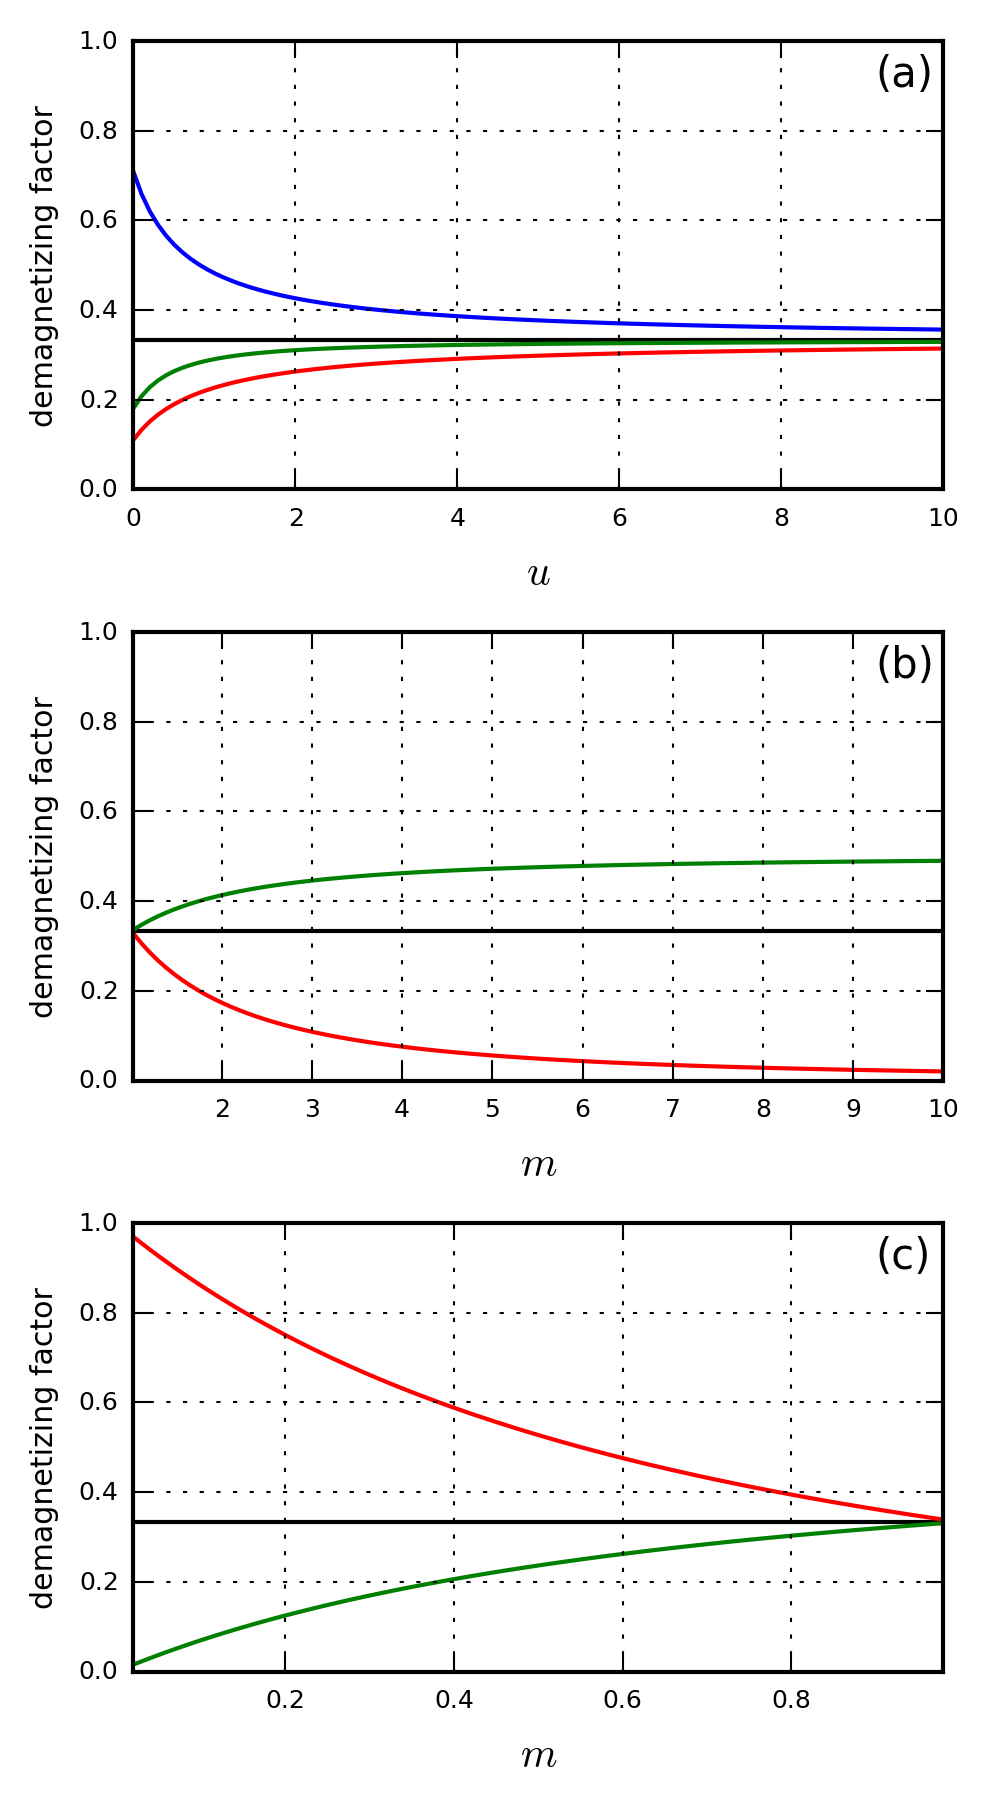

In [9]:
plt.figure(figsize=(3.27, 6))

label_fontsize = 10
label_tex_fontsize = 10

plt.subplot(3,1,1)
plt.plot([u.min(), u.max()], [1/3., 1/3.], '-k')
plt.plot(u,n11_triaxial, label='$\\tilde{n}^{\dagger}_{11}$', color='r')
plt.plot(u,n22_triaxial, label='$\\tilde{n}^{\dagger}_{22}$', color='g')
plt.plot(u,n33_triaxial, label='$\\tilde{n}^{\dagger}_{33}$', color='b')
#plt.legend(loc='upper right', fontsize=6, ncol=3)
plt.ylabel('demagnetizing factor')
plt.xlabel('$u$', fontsize=label_tex_fontsize)
plt.xlim(u.min(), u.max())
plt.ylim(0., 1.)
plt.annotate(s='(a)', xy=(0.92,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.grid()

plt.subplot(3,1,2)
plt.plot([m.min(), m.max()], [1/3., 1/3.], '-k')
plt.plot(m,n11_prolate, label='$\\tilde{n}^{\dagger}_{11}$', color='r')
plt.plot(m,n22_prolate, label='$\\tilde{n}^{\dagger}_{22}$', color='g')
#plt.legend(loc='upper right', fontsize=6, ncol=3)
plt.ylabel('demagnetizing factor')
plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m.min(), m.max())
plt.ylim(0., 1.)
plt.annotate(s='(b)', xy=(0.92,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.grid()

plt.subplot(3,1,3)
plt.plot([m_oblate.min(), m_oblate.max()], [1/3., 1/3.], '-k')
plt.plot(m_oblate,n11_oblate, label='$\\tilde{n}^{\dagger}_{11}$', color='r')
plt.plot(m_oblate,n22_oblate, label='$\\tilde{n}^{\dagger}_{22}$', color='g')
#plt.legend(loc='upper right', fontsize=6, ncol=3)
plt.ylabel('demagnetizing factor')
plt.xlabel('$m$', fontsize=label_tex_fontsize)
plt.xlim(m_oblate.min(), m_oblate.max())
plt.ylim(0., 1.)
plt.annotate(s='(c)', xy=(0.92,0.90), 
              xycoords = 'axes fraction', color='k',
              fontsize=label_fontsize)
plt.grid()

plt.tight_layout()
plt.savefig('..\\manuscript\\figures\\demag_factors.pdf', facecolor='w', bbox_inches='tight')